# Decentralized Unlabeled Multi-agent Pathfinding Via Target And Priority Swapping: Result Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sys import float_info
import matplotlib.colors as mcolors
import pandas as pd
import os
from plot_metrics import plot_metrics

pd.set_option("display.max_rows", 200)

In [2]:
ALG_TITLES = {
    "dec-tswap-2": "5 x 5",
    "dec-tswap-5": "11 x 11",
    "dec-tswap-10": "21 x 21",
    "dec-tswap": "TP-SWAP",
    "naive-dec-tswap": "D-TSWAP-N",
    "orig-tswap": "C-TSWAP",
    "base-tswap": "D-TSWAP-C",
}

COLORS_FOR_PLOTS = list(mcolors.TABLEAU_COLORS.keys())

## Main Experiments

In [3]:
files = [
    "../results/random-32-32-10/base-tswap/result.txt",
    "../results/random-32-32-10/dec-tswap/result.txt",
    "../results/random-32-32-10/naive-dec-tswap/result.txt",
    "../results/random-32-32-10/orig-tswap/result.txt",
    "../results/maze-32-32-4/base-tswap/result.txt",
    "../results/maze-32-32-4/dec-tswap/result.txt",
    "../results/maze-32-32-4/naive-dec-tswap/result.txt",
    "../results/maze-32-32-4/orig-tswap/result.txt",
    "../results/den404d/dec-tswap/result.txt",
    "../results/den404d/naive-dec-tswap/result.txt",
    "../results/den404d/base-tswap/result.txt",
    "../results/den404d/orig-tswap/result.txt",
    "../results/den312d/dec-tswap/result.txt",
    "../results/den312d/naive-dec-tswap/result.txt",
    "../results/den312d/base-tswap/result.txt",
    "../results/den312d/orig-tswap/result.txt",
    "../results/room-64-64-16/base-tswap/result.txt",
    "../results/room-64-64-16/dec-tswap/result.txt",
    "../results/room-64-64-16/naive-dec-tswap/result.txt",
    "../results/room-64-64-16/orig-tswap/result.txt",
]

In [4]:
map_types = set()
alg_types = set()
map_alg_dict = dict()

for file_path in files:
    if not os.path.exists(file_path):
        print("Results does not exist:", file_path)
        continue
    path_list = file_path.split(os.sep)
    alg_type = path_list[-2]
    map_type = path_list[-3]
    map_types.add(map_type)
    alg_types.add(alg_type)
    if map_type not in map_alg_dict:
        map_alg_dict[map_type] = dict()
    map_alg_dict[map_type][alg_type] = file_path


print(map_types, alg_types, map_alg_dict)

{'maze-32-32-4', 'den312d', 'den404d', 'room-64-64-16', 'random-32-32-10'} {'base-tswap', 'dec-tswap', 'orig-tswap', 'naive-dec-tswap'} {'random-32-32-10': {'base-tswap': '../results/random-32-32-10/base-tswap/result.txt', 'dec-tswap': '../results/random-32-32-10/dec-tswap/result.txt', 'naive-dec-tswap': '../results/random-32-32-10/naive-dec-tswap/result.txt', 'orig-tswap': '../results/random-32-32-10/orig-tswap/result.txt'}, 'maze-32-32-4': {'base-tswap': '../results/maze-32-32-4/base-tswap/result.txt', 'dec-tswap': '../results/maze-32-32-4/dec-tswap/result.txt', 'naive-dec-tswap': '../results/maze-32-32-4/naive-dec-tswap/result.txt', 'orig-tswap': '../results/maze-32-32-4/orig-tswap/result.txt'}, 'den404d': {'dec-tswap': '../results/den404d/dec-tswap/result.txt', 'naive-dec-tswap': '../results/den404d/naive-dec-tswap/result.txt', 'base-tswap': '../results/den404d/base-tswap/result.txt', 'orig-tswap': '../results/den404d/orig-tswap/result.txt'}, 'den312d': {'dec-tswap': '../results/de

In [5]:
current_directory = os.getcwd()

all_results = dict()
success_results = dict()

agents_range_map = dict()


for map_id, map_type in enumerate(map_types):
    if map_type not in all_results:
        all_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):

        res_file = map_alg_dict[map_type][alg_type]
        result = pd.read_csv(res_file, sep="\s+")
        result.loc[(result["success"] == 100), "success"] = 1
        result.loc[(result["collision"] > 0), "success"] = 0
        result.loc[(result["collision_obst"] > 0), "success"] = 0
        all_results[map_type][alg_type] = result

for map_id, map_type in enumerate(map_types):

    failed_indices = set()
    if map_type not in success_results:
        success_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        failed_indices |= set(result.index[result["success"] == 0])
    print(f'Overall failed tasks on map "{map_type}":', len(failed_indices))

    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_results[map_type][alg_type] = result.drop(failed_indices)

Overall failed tasks on map "maze-32-32-4": 0
Overall failed tasks on map "den312d": 0
Overall failed tasks on map "den404d": 0
Overall failed tasks on map "room-64-64-16": 0
Overall failed tasks on map "random-32-32-10": 0


In [6]:
results_final = dict()
agents_ranges = dict()

for map_id, map_type in enumerate(map_types):
    if map_type not in results_final:
        results_final[map_type] = dict()
        agents_ranges[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_result = success_results[map_type][alg_type]
        results_gr = result.groupby(["number"])
        agents_ranges[map_type][alg_type] = list(results_gr.groups.keys())
        success_result_gr = success_result.groupby(["number"])
        result_final = pd.DataFrame()
        result_final["count"] = results_gr["success"].count()
        result_final["success"] = results_gr["success"].mean() * 100
        result_final["flowtime"] = success_result_gr["flowtime"].mean()
        result_final["makespan"] = success_result_gr["makespan"].mean()
        result_final["makespan (std)"] = success_result_gr["makespan"].std(ddof=0)
        result_final["flowtime (std)"] = success_result_gr["flowtime"].std(ddof=0)
        results_final[map_type][alg_type] = result_final
        print(map_type, alg_type)

maze-32-32-4 base-tswap
maze-32-32-4 dec-tswap
maze-32-32-4 orig-tswap
maze-32-32-4 naive-dec-tswap
den312d base-tswap
den312d dec-tswap
den312d orig-tswap
den312d naive-dec-tswap
den404d base-tswap
den404d dec-tswap
den404d orig-tswap
den404d naive-dec-tswap
room-64-64-16 base-tswap
room-64-64-16 dec-tswap
room-64-64-16 orig-tswap
room-64-64-16 naive-dec-tswap
random-32-32-10 base-tswap
random-32-32-10 dec-tswap
random-32-32-10 orig-tswap
random-32-32-10 naive-dec-tswap


### Success Rate

In [7]:
sr_maps = ["random-32-32-10", "maze-32-32-4", "den404d"]
results_sr = []
for map_id, map_type in enumerate(sr_maps):
    sr_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_types):
        sr_df.insert(alg_id, alg_type, results_final[map_type][alg_type]["success"])
    results_sr.append(sr_df)

In [8]:
all_sr = pd.concat(results_sr, axis=1, join="inner", keys=sr_maps)
all_sr = all_sr.style.set_properties(**{"text-align": "center"})
all_sr.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=0)

### Makespan and Flowtime Metrics

#### Publication

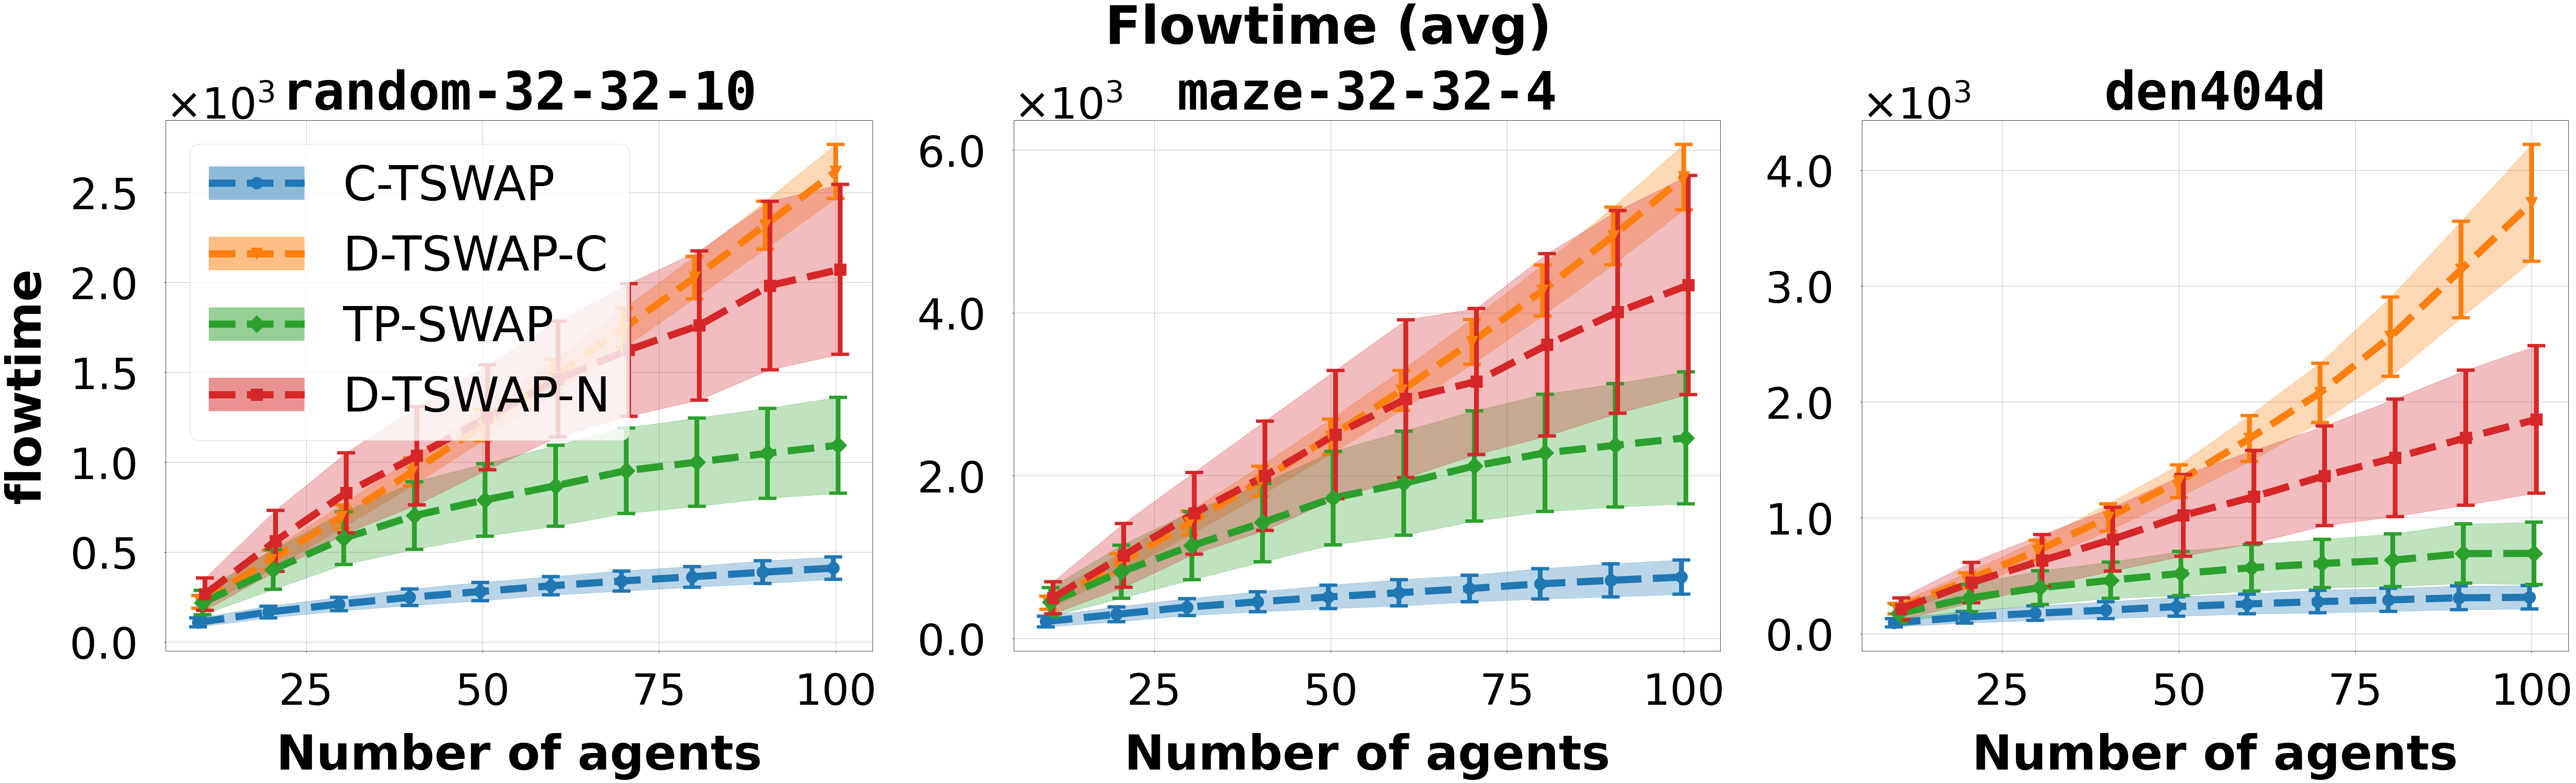

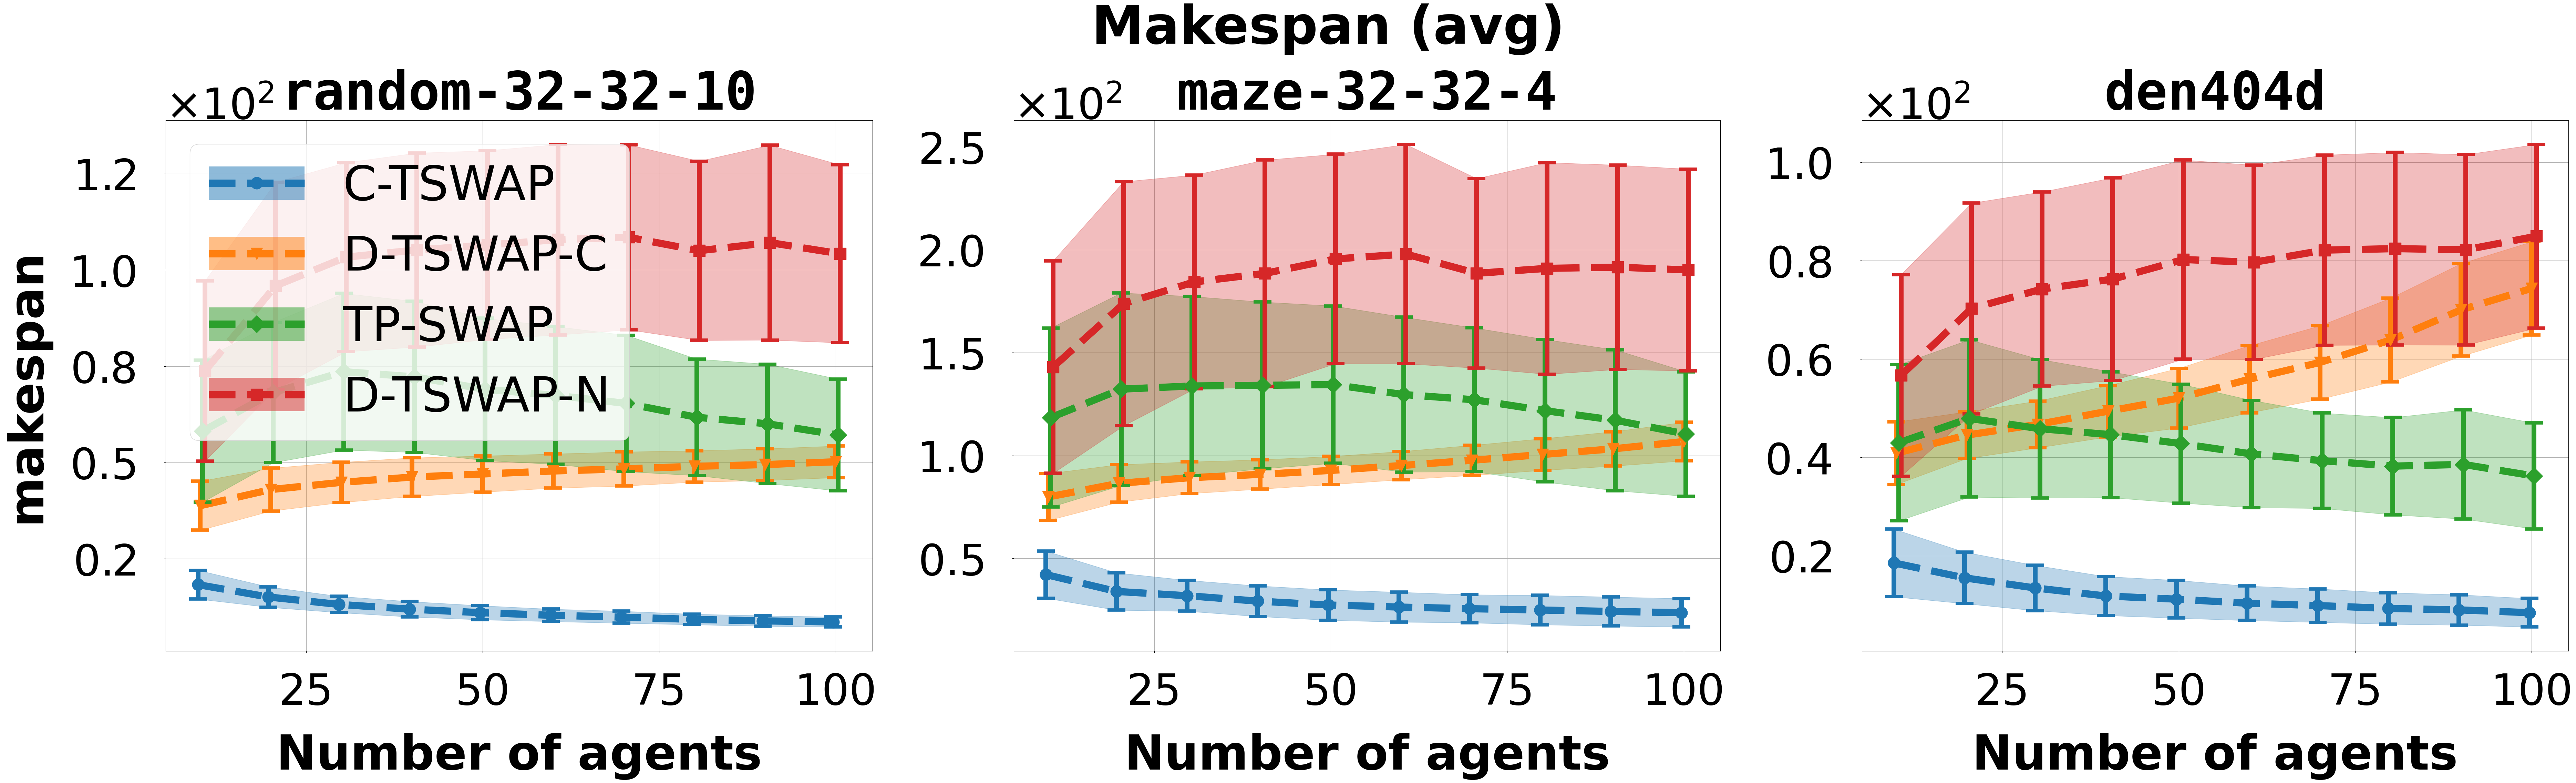

In [9]:
metrics = ["flowtime", "makespan"]
metric_titles = {"makespan": "Makespan (avg)", "flowtime": "Flowtime (avg)"}
alg_order = ["orig-tswap", "base-tswap", "dec-tswap", "naive-dec-tswap"]
metric_maps = ["random-32-32-10", "maze-32-32-4", "den404d"]
plot_metrics(
    metrics,
    metric_titles,
    metric_maps,
    alg_order,
    results_final,
    agents_ranges,
    COLORS_FOR_PLOTS,
    ALG_TITLES,
    (90, 20),
    True,
    110,
    110,
    15,
    25,
    100,
    100,
    90,
    90,
    "paper",
)

#### Poster

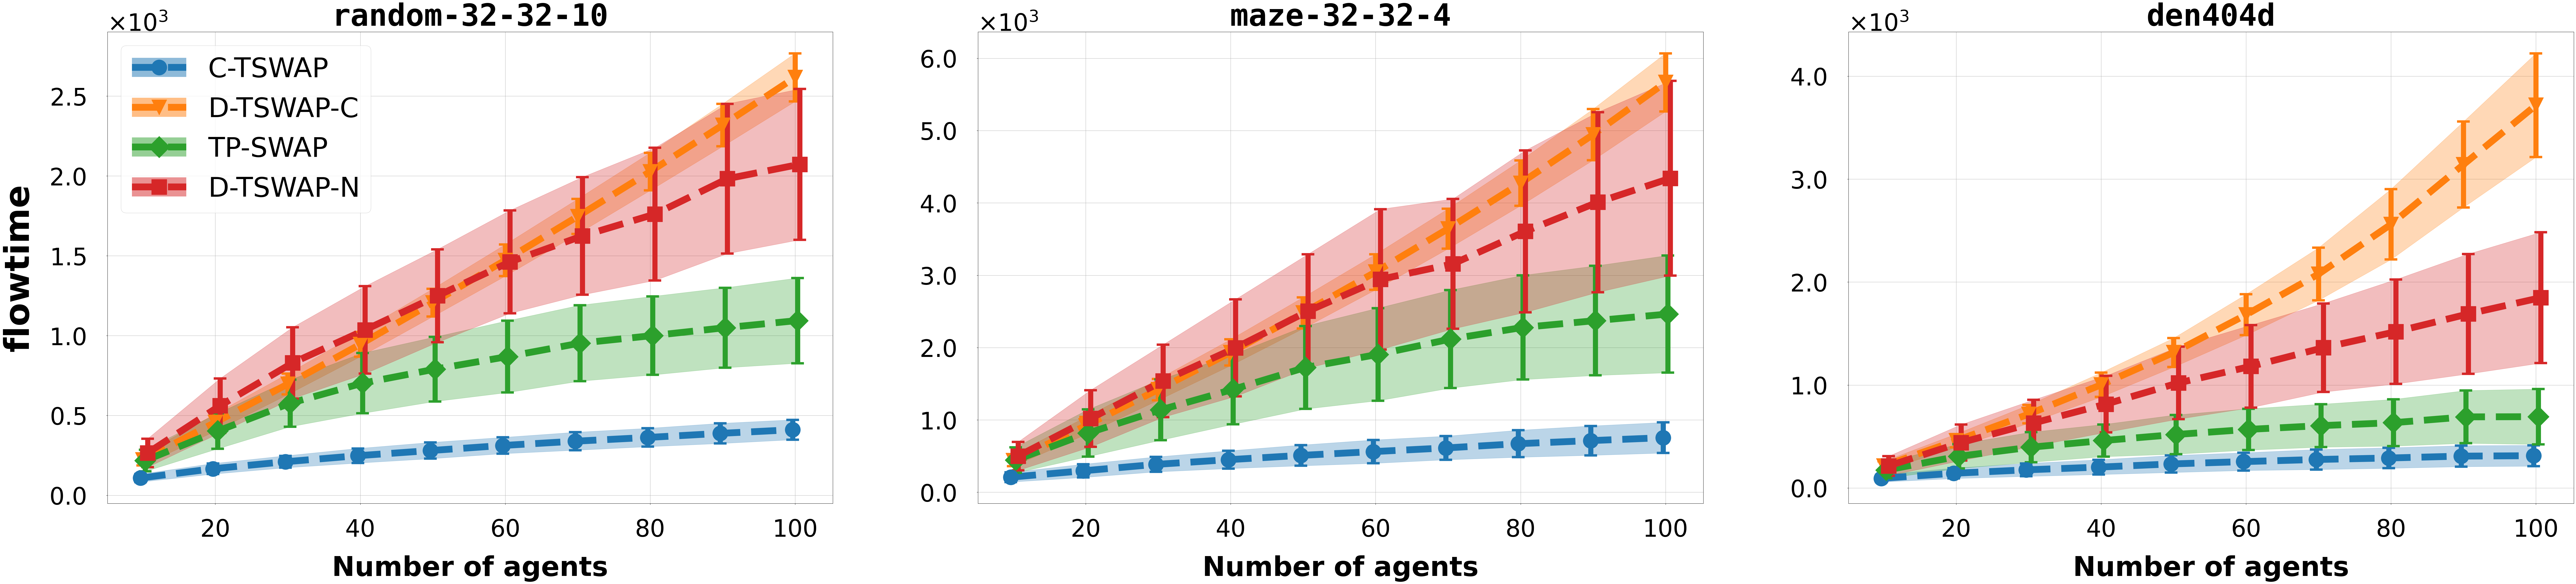

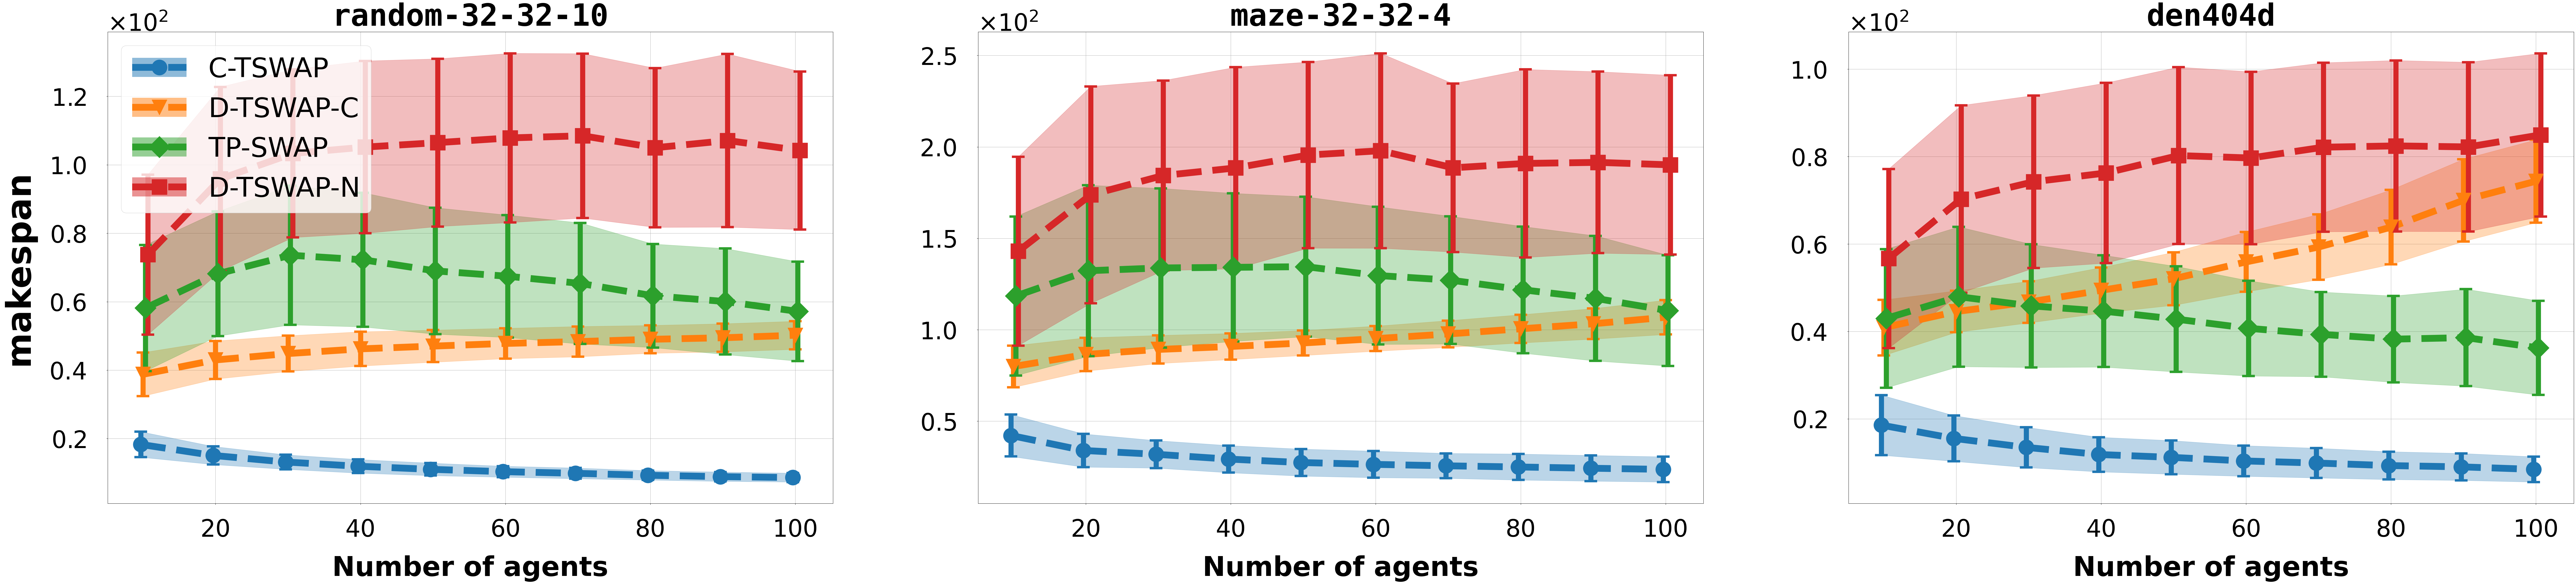

In [10]:
metrics = [
    "flowtime",
    "makespan",
]
metric_titles = {"makespan": "Makespan (avg)", "flowtime": "Flowtime (avg)"}
alg_order = ["orig-tswap", "base-tswap", "dec-tswap", "naive-dec-tswap"]
metric_maps = ["random-32-32-10", "maze-32-32-4", "den404d"]
plot_metrics(
    metrics,
    metric_titles,
    metric_maps,
    alg_order,
    results_final,
    agents_ranges,
    COLORS_FOR_PLOTS,
    ALG_TITLES,
    (130, 25),
    False,
    90,
    90,
    20,
    45,
    80,
    80,
    70,
    70,
    "poster",
)

### Additional Comparison of the Fully Decentralized Solvers

In [11]:
results_sr = []
results_final = dict()
agents_range = []

maps_sr = ["den312d", "room-64-64-16"]
alg_sr = ["dec-tswap", "naive-dec-tswap"]
limits = list(range(600, 199, -100))
for map_id, map_type in enumerate(maps_sr):
    result_curr_sr = pd.DataFrame()
    for limit in limits:
        sr_df = pd.DataFrame()
        if map_type not in results_final:
            results_final[map_type] = dict()
        for alg_id, alg_type in enumerate(alg_sr):
            result = all_results[map_type][alg_type].copy()
            result.loc[(result["makespan"] > limit), "success"] = 0
            results_gr = result.groupby(["number"])
            result_final = pd.DataFrame()
            result_final["success"] = results_gr["success"].mean() * 100
            sr_df.insert(alg_id, ALG_TITLES[alg_type], result_final["success"])
        result_curr_sr = pd.concat([result_curr_sr, sr_df[sr_df.index == 100]])

    result_curr_sr.insert(0, "limit", limits, True)
    result_curr_sr.set_index("limit", inplace=True)
    results_sr.append(result_curr_sr)

In [12]:
all_sr = pd.concat(results_sr, axis=1, join="inner", keys=maps_sr)
all_sr = all_sr.style.set_properties(**{"text-align": "center"})
all_sr.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=0)

### Impact of the Communication Range

In [13]:
files = [
    "../results/maze-32-32-4/dec-tswap-2/result.txt",
    "../results/maze-32-32-4/dec-tswap-5/result.txt",
    "../results/maze-32-32-4/dec-tswap-10/result.txt",
]

In [14]:
map_types = set()
alg_types = set()
map_alg_dict = dict()

for file_path in files:
    if not os.path.exists(file_path):
        print("Results does not exist:", file_path)
        continue
    path_list = file_path.split(os.sep)
    alg_type = path_list[-2]
    map_type = path_list[-3]
    map_types.add(map_type)
    alg_types.add(alg_type)
    if map_type not in map_alg_dict:
        map_alg_dict[map_type] = dict()
    map_alg_dict[map_type][alg_type] = file_path

print(map_types, alg_types, map_alg_dict)

{'maze-32-32-4'} {'dec-tswap-10', 'dec-tswap-5', 'dec-tswap-2'} {'maze-32-32-4': {'dec-tswap-2': '../results/maze-32-32-4/dec-tswap-2/result.txt', 'dec-tswap-5': '../results/maze-32-32-4/dec-tswap-5/result.txt', 'dec-tswap-10': '../results/maze-32-32-4/dec-tswap-10/result.txt'}}


In [15]:
current_directory = os.getcwd()
all_results = dict()
success_results = dict()
agents_range_map = dict()

for map_id, map_type in enumerate(map_types):
    if map_type not in all_results:
        all_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        res_file = map_alg_dict[map_type][alg_type]
        result = pd.read_csv(res_file, sep="\s+")
        result.loc[(result["success"] == 100), "success"] = 1
        result.loc[(result["collision"] > 0), "success"] = 0
        result.loc[(result["collision_obst"] > 0), "success"] = 0
        all_results[map_type][alg_type] = result

for map_id, map_type in enumerate(map_types):

    failed_indices = set()
    if map_type not in success_results:
        success_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        failed_indices |= set(result.index[result["success"] == 0])
    print(f'Overall failed tasks on map "{map_type}":', len(failed_indices))

    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_results[map_type][alg_type] = result.drop(failed_indices)

Overall failed tasks on map "maze-32-32-4": 0


In [16]:
results_final = dict()
agents_range = []


for map_id, map_type in enumerate(map_types):
    if map_type not in results_final:
        results_final[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_result = success_results[map_type][alg_type]

        results_gr = result.groupby(["number"])

        agents_range = list(results_gr.groups.keys())

        success_result_gr = success_result.groupby(["number"])

        result_final = pd.DataFrame()
        result_final["count"] = results_gr["success"].count()
        result_final["success"] = results_gr["success"].mean() * 100
        result_final["flowtime"] = success_result_gr["flowtime"].mean()
        result_final["makespan"] = success_result_gr["makespan"].mean()
        result_final["mean_groups"] = (
            success_result_gr["mean_groups"].mean()
            if "mean_groups" in success_result
            else 0
        )
        result_final["mean_groups_size"] = (
            success_result_gr["mean_groups_size"].mean()
            if "mean_groups_size" in success_result
            else 0
        )
        result_final["makespan (std)"] = success_result_gr["makespan"].std(ddof=0)
        result_final["flowtime (std)"] = success_result_gr["flowtime"].std(ddof=0)
        results_final[map_type][alg_type] = result_final

In [17]:
results_sr = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    sr_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        sr_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["success"]
        )
    results_sr.append(sr_df)


all_sr_df = pd.concat(results_sr, axis=1, join="inner", keys=map_types)
all_sr_df = all_sr_df[all_sr_df.index % 20 == 0]
all_sr_df = all_sr_df.style.set_properties(**{"text-align": "center"})
all_sr_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=0)

In [18]:
results_flowtime = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    ft_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        ft_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["flowtime"]
        )
    results_flowtime.append(ft_df)


all_ft_df = pd.concat(results_flowtime, axis=1, join="inner", keys=map_types)
all_ft_df = all_ft_df[all_ft_df.index % 20 == 0]
all_ft_df = all_ft_df.style.set_properties(**{"text-align": "center"})
all_ft_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=1)

## Extended Experiments

### Makespan and Flowtime Metrics

In [19]:
files = [
    "../results/room-32-32-4/base-tswap/result.txt",
    "../results/room-32-32-4/dec-tswap/result.txt",
    "../results/room-32-32-4/naive-dec-tswap/result.txt",
    "../results/room-32-32-4/orig-tswap/result.txt",
    "../results/empty-32-32/base-tswap/result.txt",
    "../results/empty-32-32/dec-tswap/result.txt",
    "../results/empty-32-32/naive-dec-tswap/result.txt",
    "../results/empty-32-32/orig-tswap/result.txt",
    "../results/warehouse-20-40-10-2-1/dec-tswap/result.txt",
    "../results/warehouse-20-40-10-2-1/naive-dec-tswap/result.txt",
    "../results/warehouse-20-40-10-2-1/base-tswap/result.txt",
    "../results/warehouse-20-40-10-2-1/orig-tswap/result.txt",
    "../results/den520d/dec-tswap/result.txt",
    "../results/den520d/naive-dec-tswap/result.txt",
    "../results/den520d/base-tswap/result.txt",
    "../results/den520d/orig-tswap/result.txt",
]

In [20]:
map_types = set()
alg_types = set()
map_alg_dict = dict()

for file_path in files:
    if not os.path.exists(file_path):
        print("Results does not exist:", file_path)
        continue
    path_list = file_path.split(os.sep)
    alg_type = path_list[-2]
    map_type = path_list[-3]
    map_types.add(map_type)
    alg_types.add(alg_type)
    if map_type not in map_alg_dict:
        map_alg_dict[map_type] = dict()
    map_alg_dict[map_type][alg_type] = file_path


print(map_types, alg_types, map_alg_dict)

{'empty-32-32', 'room-32-32-4', 'warehouse-20-40-10-2-1', 'den520d'} {'base-tswap', 'dec-tswap', 'orig-tswap', 'naive-dec-tswap'} {'room-32-32-4': {'base-tswap': '../results/room-32-32-4/base-tswap/result.txt', 'dec-tswap': '../results/room-32-32-4/dec-tswap/result.txt', 'naive-dec-tswap': '../results/room-32-32-4/naive-dec-tswap/result.txt', 'orig-tswap': '../results/room-32-32-4/orig-tswap/result.txt'}, 'empty-32-32': {'base-tswap': '../results/empty-32-32/base-tswap/result.txt', 'dec-tswap': '../results/empty-32-32/dec-tswap/result.txt', 'naive-dec-tswap': '../results/empty-32-32/naive-dec-tswap/result.txt', 'orig-tswap': '../results/empty-32-32/orig-tswap/result.txt'}, 'warehouse-20-40-10-2-1': {'dec-tswap': '../results/warehouse-20-40-10-2-1/dec-tswap/result.txt', 'naive-dec-tswap': '../results/warehouse-20-40-10-2-1/naive-dec-tswap/result.txt', 'base-tswap': '../results/warehouse-20-40-10-2-1/base-tswap/result.txt', 'orig-tswap': '../results/warehouse-20-40-10-2-1/orig-tswap/resu

In [21]:
current_directory = os.getcwd()

all_results = dict()
success_results = dict()

agents_range_map = dict()


for map_id, map_type in enumerate(map_types):
    if map_type not in all_results:
        all_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        res_file = map_alg_dict[map_type][alg_type]
        result = pd.read_csv(res_file, sep="\s+")
        result.loc[(result["success"] == 100), "success"] = 1
        result.loc[(result["collision"] > 0), "success"] = 0
        result.loc[(result["collision_obst"] > 0), "success"] = 0
        all_results[map_type][alg_type] = result

for map_id, map_type in enumerate(map_types):

    failed_indices = set()
    if map_type not in success_results:
        success_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        failed_indices |= set(result.index[result["success"] == 0])
    print(f'Overall failed tasks on map "{map_type}":', len(failed_indices))

    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_results[map_type][alg_type] = result.drop(failed_indices)

Overall failed tasks on map "empty-32-32": 0
Overall failed tasks on map "room-32-32-4": 0
Overall failed tasks on map "warehouse-20-40-10-2-1": 0
Overall failed tasks on map "den520d": 0


In [22]:
results_sr = []
results_final = dict()
agents_ranges = dict()

for map_id, map_type in enumerate(map_types):
    if map_type not in results_final:
        results_final[map_type] = dict()
        agents_ranges[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_result = success_results[map_type][alg_type]
        results_gr = result.groupby(["number"])
        agents_ranges[map_type][alg_type] = list(results_gr.groups.keys())
        success_result_gr = success_result.groupby(["number"])
        result_final = pd.DataFrame()
        result_final["count"] = results_gr["success"].count()
        result_final["success"] = results_gr["success"].mean() * 100
        result_final["flowtime"] = success_result_gr["flowtime"].mean()
        result_final["makespan"] = success_result_gr["makespan"].mean()
        result_final["makespan (std)"] = success_result_gr["makespan"].std(ddof=0)
        result_final["flowtime (std)"] = success_result_gr["flowtime"].std(ddof=0)
        results_final[map_type][alg_type] = result_final
        print(map_type, alg_type)

empty-32-32 base-tswap
empty-32-32 dec-tswap
empty-32-32 orig-tswap
empty-32-32 naive-dec-tswap
room-32-32-4 base-tswap
room-32-32-4 dec-tswap
room-32-32-4 orig-tswap
room-32-32-4 naive-dec-tswap
warehouse-20-40-10-2-1 base-tswap
warehouse-20-40-10-2-1 dec-tswap
warehouse-20-40-10-2-1 orig-tswap
warehouse-20-40-10-2-1 naive-dec-tswap
den520d base-tswap
den520d dec-tswap
den520d orig-tswap
den520d naive-dec-tswap


In [23]:
results_final = dict()
agents_range = []

for map_id, map_type in enumerate(map_types):
    if map_type not in results_final:
        results_final[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_result = success_results[map_type][alg_type]
        results_gr = result.groupby(["number"])
        agents_range = list(results_gr.groups.keys())
        success_result_gr = success_result.groupby(["number"])

        result_final = pd.DataFrame()
        result_final["count"] = results_gr["success"].count()
        result_final["success"] = results_gr["success"].mean() * 100
        result_final["flowtime"] = success_result_gr["flowtime"].mean()
        result_final["makespan"] = success_result_gr["makespan"].mean()
        result_final["makespan (std)"] = success_result_gr["makespan"].std(ddof=0)
        result_final["flowtime (std)"] = success_result_gr["flowtime"].std(ddof=0)
        results_final[map_type][alg_type] = result_final

In [24]:
results_sr = []
alg_order = ["orig-tswap", "base-tswap", "naive-dec-tswap", "dec-tswap"]

for map_id, map_type in enumerate(map_types):
    sr_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        sr_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["success"]
        )
    results_sr.append(sr_df)


all_sr_df = pd.concat(results_sr, axis=1, join="outer", keys=map_types)
all_sr_df = all_sr_df.fillna("-")
all_sr_df = all_sr_df.style.set_properties(**{"text-align": "center"})
all_sr_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=0)

In [25]:
results_flowtime = []
alg_order = ["orig-tswap", "base-tswap", "naive-dec-tswap", "dec-tswap"]

for map_id, map_type in enumerate(map_types):
    ft_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        ft_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["flowtime"]
        )
    results_flowtime.append(ft_df)


all_ft_df = pd.concat(results_flowtime, axis=1, join="outer", keys=map_types)
all_ft_df = all_ft_df.fillna("-")
all_ft_df = all_ft_df.style.set_properties(**{"text-align": "center"})
all_ft_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=1)

In [26]:
results_makespan = []
alg_order = ["orig-tswap", "base-tswap", "naive-dec-tswap", "dec-tswap"]

for map_id, map_type in enumerate(map_types):
    ms_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        ms_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["makespan"]
        )
    results_makespan.append(ms_df)

all_ms_df = pd.concat(results_makespan, axis=1, join="outer", keys=map_types)
all_ms_df = all_ms_df.fillna("-")
all_ms_df = all_ms_df.style.set_properties(**{"text-align": "center"})
all_ms_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=1)

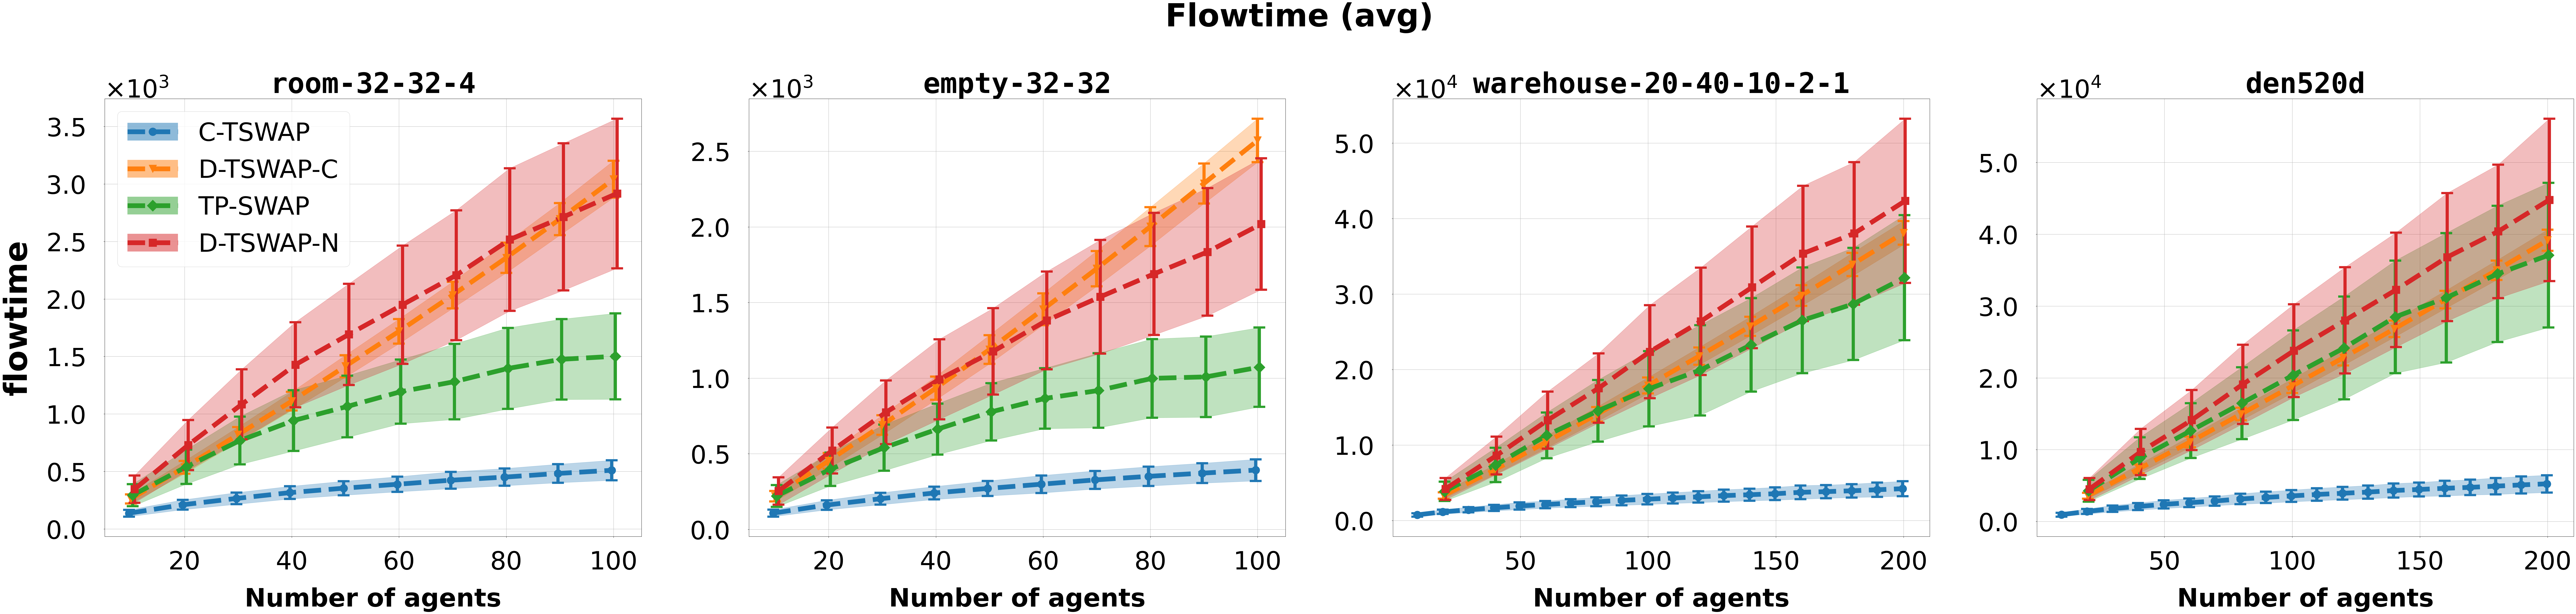

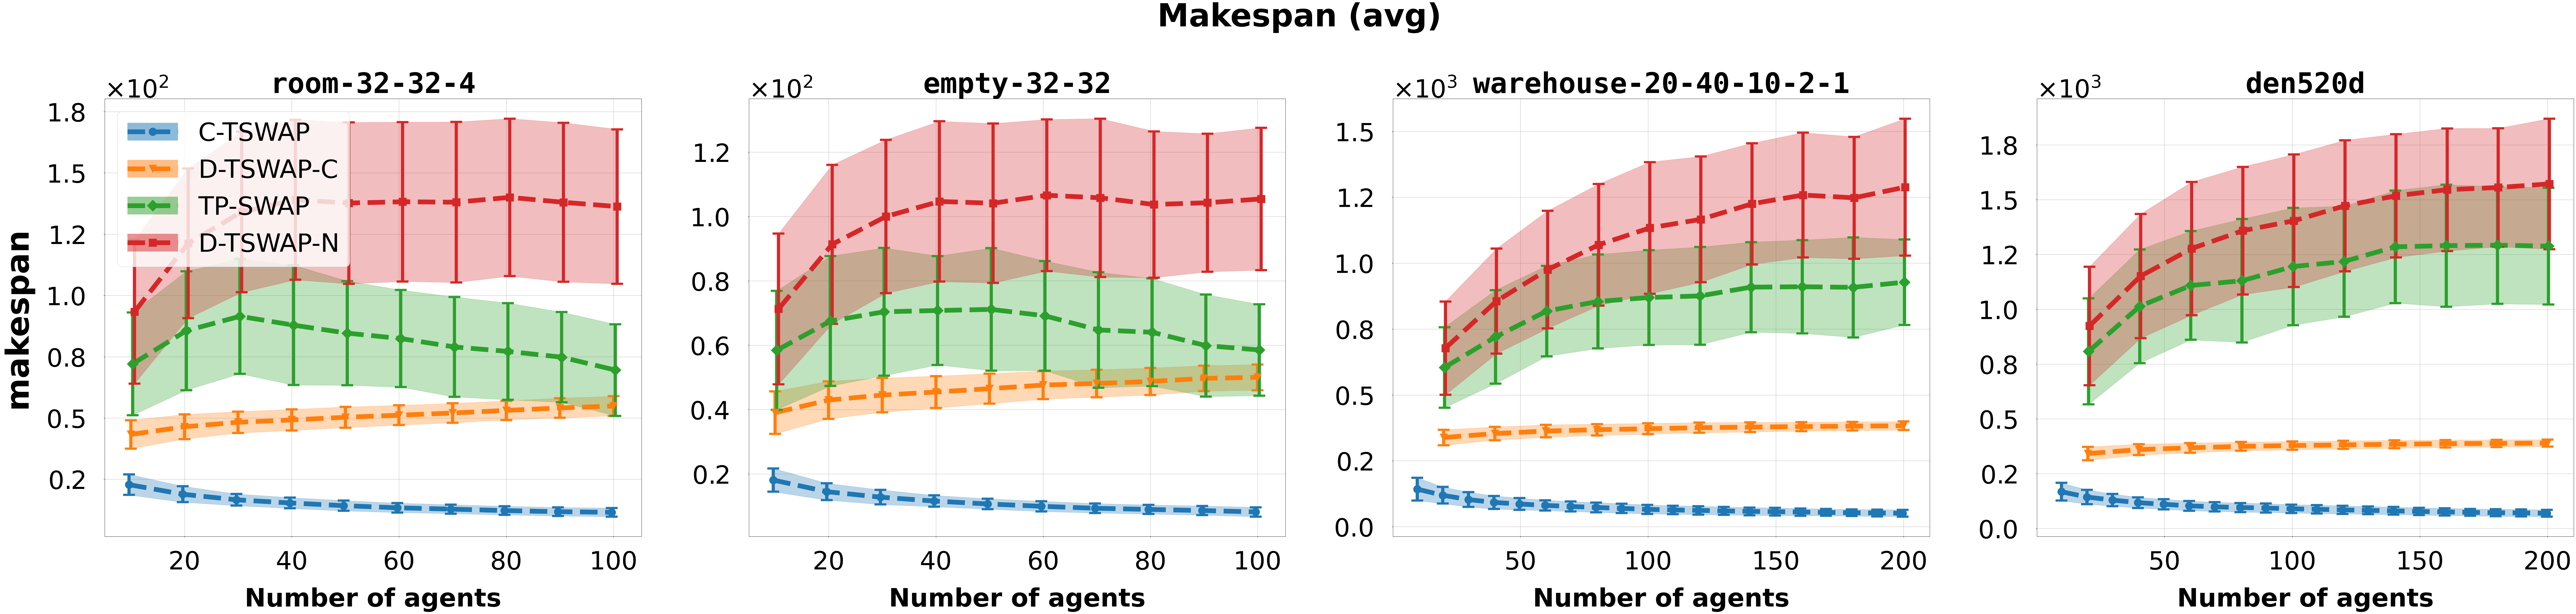

In [27]:
metrics = ["flowtime", "makespan"]
metric_titles = {"makespan": "Makespan (avg)", "flowtime": "Flowtime (avg)"}
alg_order = ["orig-tswap", "base-tswap", "dec-tswap", "naive-dec-tswap"]
metric_maps = ["room-32-32-4", "empty-32-32", "warehouse-20-40-10-2-1", "den520d"]
plot_metrics(
    metrics,
    metric_titles,
    metric_maps,
    alg_order,
    results_final,
    agents_ranges,
    COLORS_FOR_PLOTS,
    ALG_TITLES,
    (140, 25),
    True,
    100,
    90,
    15,
    25,
    80,
    80,
    80,
    80,
    "supplementary",
)

### Impact of the Communication Range

In [28]:
files = [
    "../results/maze-32-32-4/dec-tswap-2/result.txt",
    "../results/maze-32-32-4/dec-tswap-5/result.txt",
    "../results/maze-32-32-4/dec-tswap-10/result.txt",
]

In [29]:
map_types = set()
alg_types = set()
map_alg_dict = dict()

for file_path in files:
    if not os.path.exists(file_path):
        print("Results does not exist:", file_path)
        continue
    path_list = file_path.split(os.sep)
    alg_type = path_list[-2]
    map_type = path_list[-3]
    map_types.add(map_type)
    alg_types.add(alg_type)
    if map_type not in map_alg_dict:
        map_alg_dict[map_type] = dict()
    map_alg_dict[map_type][alg_type] = file_path

print(map_types, alg_types, map_alg_dict)

{'maze-32-32-4'} {'dec-tswap-10', 'dec-tswap-5', 'dec-tswap-2'} {'maze-32-32-4': {'dec-tswap-2': '../results/maze-32-32-4/dec-tswap-2/result.txt', 'dec-tswap-5': '../results/maze-32-32-4/dec-tswap-5/result.txt', 'dec-tswap-10': '../results/maze-32-32-4/dec-tswap-10/result.txt'}}


In [30]:
current_directory = os.getcwd()

all_results = dict()
success_results = dict()

agents_range_map = dict()

for map_id, map_type in enumerate(map_types):
    if map_type not in all_results:
        all_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        res_file = map_alg_dict[map_type][alg_type]
        result = pd.read_csv(res_file, sep="\s+")
        result.loc[(result["success"] == 100), "success"] = 1
        result.loc[(result["collision"] > 0), "success"] = 0
        result.loc[(result["collision_obst"] > 0), "success"] = 0
        all_results[map_type][alg_type] = result

for map_id, map_type in enumerate(map_types):

    failed_indices = set()
    if map_type not in success_results:
        success_results[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        failed_indices |= set(result.index[result["success"] == 0])
    print(f'Overall failed tasks on map "{map_type}":', len(failed_indices))

    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_results[map_type][alg_type] = result.drop(failed_indices)

Overall failed tasks on map "maze-32-32-4": 0


In [31]:
results_final = dict()
agents_range = []


for map_id, map_type in enumerate(map_types):
    if map_type not in results_final:
        results_final[map_type] = dict()
    for alg_id, alg_type in enumerate(alg_types):
        result = all_results[map_type][alg_type]
        success_result = success_results[map_type][alg_type]

        results_gr = result.groupby(["number"])

        agents_range = list(results_gr.groups.keys())

        success_result_gr = success_result.groupby(["number"])

        result_final = pd.DataFrame()
        result_final["count"] = results_gr["success"].count()
        result_final["success"] = results_gr["success"].mean() * 100
        result_final["flowtime"] = success_result_gr["flowtime"].mean()
        result_final["makespan"] = success_result_gr["makespan"].mean()
        result_final["mean_groups"] = (
            success_result_gr["mean_groups"].mean()
            if "mean_groups" in success_result
            else 0
        )
        result_final["mean_groups_size"] = (
            success_result_gr["mean_groups_size"].mean()
            if "mean_groups_size" in success_result
            else 0
        )
        result_final["makespan (std)"] = success_result_gr["makespan"].std(ddof=0)
        result_final["flowtime (std)"] = success_result_gr["flowtime"].std(ddof=0)
        results_final[map_type][alg_type] = result_final

In [32]:
results_sr = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    sr_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        sr_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["success"]
        )
    results_sr.append(sr_df)


all_sr_df = pd.concat(results_sr, axis=1, join="inner", keys=map_types)
all_sr_df = all_sr_df.style.set_properties(**{"text-align": "center"})
all_sr_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=1)

In [33]:
results_flowtime = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    ft_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        ft_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["flowtime"]
        )
    results_flowtime.append(ft_df)

all_ft_df = pd.concat(results_flowtime, axis=1, join="inner", keys=map_types)

In [34]:
results_makespan = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    ms_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        ms_df.insert(
            alg_id, ALG_TITLES[alg_type], results_final[map_type][alg_type]["makespan"]
        )
    results_makespan.append(ms_df)

all_ms_df = pd.concat(results_makespan, axis=1, join="inner", keys=map_types)

In [35]:
all_metric_df = pd.concat(
    [all_ms_df, all_ft_df], axis=1, join="inner", keys=["makespan", "flowtime"]
)
all_metric_df = all_metric_df.style.set_properties(**{"text-align": "center"})
all_metric_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=1)

In [36]:
results_mgroup = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    mg_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        mg_df.insert(
            alg_id,
            ALG_TITLES[alg_type],
            results_final[map_type][alg_type]["mean_groups"],
        )
    results_mgroup.append(mg_df)


all_mg_df = pd.concat(results_mgroup, axis=1, join="inner", keys=map_types)

In [37]:
results_mgsize = []
alg_order = ["dec-tswap-2", "dec-tswap-5", "dec-tswap-10"]

for map_id, map_type in enumerate(map_types):
    mgs_df = pd.DataFrame()
    for alg_id, alg_type in enumerate(alg_order):
        mgs_df.insert(
            alg_id,
            ALG_TITLES[alg_type],
            results_final[map_type][alg_type]["mean_groups_size"],
        )
    results_mgsize.append(mgs_df)


all_mgs_df = pd.concat(results_mgsize, axis=1, join="inner", keys=map_types)

In [38]:
all_groups_metric_df = pd.concat(
    [all_mg_df, all_mgs_df],
    axis=1,
    join="inner",
    keys=["mean_group", "mean_groups_size"],
)

all_groups_metric_df = all_groups_metric_df.rename(
    columns={"mean_group": "Number of groups", "mean_groups_size": "Groups’ sizes"}
)
all_groups_metric_df = all_groups_metric_df.style.set_properties(
    **{"text-align": "center"}
)
all_groups_metric_df.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
).format(precision=0)